In [1]:
# std
import os
import sys
import inspect
import time
import pathlib
from math import sqrt
from math import log2
# packgaes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline

# packages
from matplotlib.colors import ListedColormap

## sklearn
from sklearn.preprocessing import StandardScaler,PowerTransformer,MinMaxScaler,QuantileTransformer,normalize
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2

from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import median_absolute_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor



# for selection the right path
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

from common.model_trainer_reg import *

from GD.LinearRegression import LinearRegression
from KNN.KNNRegressor import KNNRegressor

In [2]:
# Custom functions

module_path = pathlib.Path(os.getcwd()).parent
if str(module_path) not in sys.path:
    sys.path.append(str(module_path))
print(sys.path)

from common.dataset_grabber import get_data_path

['/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2/Metro', '', '/home/alexander/ngsuite/ngsolve-install/lib/python3/dist-packages', '/home/alexander/ngsuite/ngsolve-install/bin', '/home/alexander/.local/bin', '/usr/local/sbin', '/usr/local/bin', '/usr/sbin', '/usr/bin', '/sbin', '/bin', '/usr/games', '/usr/local/games', '/snap/bin', '/home/alexander/.vscode/extensions/ms-toolsai.jupyter-2020.11.392013122/pythonFiles', '/home/alexander/.vscode/extensions/ms-toolsai.jupyter-2020.11.392013122/pythonFiles/lib/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/home/alexander/.local/lib/python3.7/site-packages', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '

In [3]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    plt.legend(loc="best")
    plt.grid()
    return plt

In [4]:
def plot_learning_curve_test(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)

    display(train_sizes[1])



    # Plot learning curve
    plt.plot(train_sizes[0],train_sizes[1][1], 'o-', color="r",
                 label="Training score")
    '''
    plt.plot(train_sizes, 'o-', color="g",
                 label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt
    '''

In [5]:
datapath = get_data_path("Metro", "Metro_Interstate_Traffic_Volume.csv")
display(datapath)

PosixPath('/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2/Datasets/Metro/Metro_Interstate_Traffic_Volume.csv')

In [6]:
df_raw = pd.read_csv(datapath)

df_raw

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


# Dataset preparation

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


# different holiday

In [8]:
df_raw

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [9]:
holiday_list = df_raw.holiday.unique()
holiday_list

array(['None', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [10]:
for l in holiday_list:
    if l == "None":
        df_raw = df_raw.replace(l,0)
for l in holiday_list:
    if l != "None":
        df_raw = df_raw.replace(l,1)

In [11]:
df_raw


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,0,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,0,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,0,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,0,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,0,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,0,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,0,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,0,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [12]:
holiday_list = df_raw.holiday.unique()
holiday_list

array([0, 1])

In [13]:
indexNames = df_raw.index[df_raw.holiday == 1]
df_raw.drop(indexNames , inplace=True)

In [14]:
df_raw

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,0,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,0,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,0,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,0,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,0,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,0,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,0,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,0,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


# handling the outlayers
## some distributions

The minimal temperature in one row is 0.0 Kelvin that is not possible. So the row will delitet and so the one row with the 9831.3 rain.

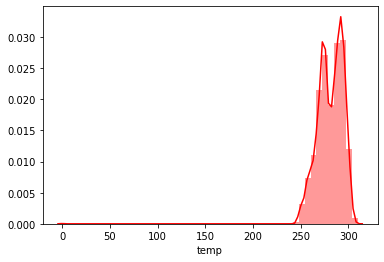

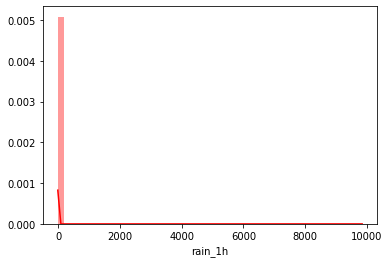

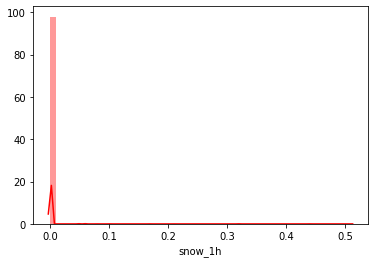

In [15]:
sns.distplot(df_raw["temp"], color="red")
name = "temp"
plt.savefig("out/prep/raw_dist_"+ name +".png")
plt.show()
sns.distplot(df_raw["rain_1h"], color="red")
name = "rain_1h"
plt.savefig("out/prep/raw_dist_"+ name +".png")
plt.show()
sns.distplot(df_raw["snow_1h"], color="red")
name = "snow_1h"
plt.savefig("out/prep/raw_dist_"+ name +".png")
plt.show()

## show the outliers

In [16]:
print("min Ttemperatur K: ",np.min(df_raw["temp"]),"mean Ttemperatur K: ",np.mean(df_raw["temp"]))
print("max rain: ",np.max(df_raw["rain_1h"]),"mean rain: ",np.mean(df_raw["rain_1h"]))
print("max snow: ",np.max(df_raw["snow_1h"]),"max snow: ",np.min(df_raw["snow_1h"]))

min Ttemperatur K:  0.0 mean Ttemperatur K:  281.20953212305005
max rain:  9831.3 mean rain:  0.33460876970691483
max snow:  0.51 max snow:  0.0


## clean the dataset by dropping the rows with the outlires

In [17]:
indexNames = df_raw.index[df_raw.temp == np.min(df_raw["temp"])]
df_raw.drop(indexNames , inplace=True)

In [18]:
print("min Ttemperatur K: ",np.min(df_raw["temp"]),"mean Ttemperatur K: ",np.mean(df_raw["temp"]))
print("max rain: ",np.max(df_raw["rain_1h"]),"mean rain: ",np.mean(df_raw["rain_1h"]))
print("max snow: ",np.max(df_raw["snow_1h"]),"max snow: ",np.min(df_raw["snow_1h"]))

min Ttemperatur K:  243.39 mean Ttemperatur K:  281.2679555606341
max rain:  9831.3 mean rain:  0.33467828724575654
max snow:  0.51 max snow:  0.0


In [19]:
indexNames = df_raw.index[df_raw.rain_1h > 300]
df_raw.drop(indexNames , inplace=True)

In [20]:
print("min Ttemperatur K: ",np.min(df_raw["temp"]),"mean Ttemperatur K: ",np.mean(df_raw["temp"]))
print("max rain: ",np.max(df_raw["rain_1h"]),"mean rain: ",np.mean(df_raw["rain_1h"]))
print("max snow: ",np.max(df_raw["snow_1h"]),"max snow: ",np.min(df_raw["snow_1h"]))

min Ttemperatur K:  243.39 mean Ttemperatur K:  281.2675225421757
max rain:  55.63 mean rain:  0.13042819745699327
max snow:  0.51 max snow:  0.0


## looks much better

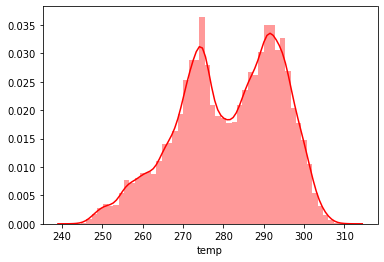

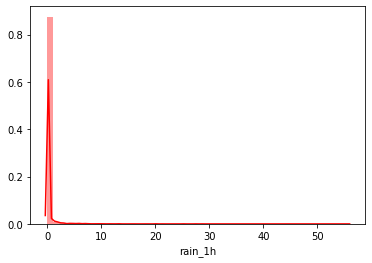

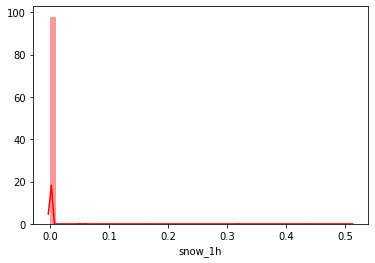

In [21]:
sns.distplot(df_raw["temp"], color="red")
name = "temp"
plt.savefig("out/prep/dist_"+ name +".png")
plt.show()
sns.distplot(df_raw["rain_1h"], color="red")
name = "rain_1h"
plt.savefig("out/prep/dist_"+ name +".png")
plt.show()
sns.distplot(df_raw["snow_1h"], color="red")
name = "snow_1h"
plt.savefig("out/prep/dist_"+ name +".png")
plt.show()

## converts the date coloum into a better fromat

In [22]:
df_raw["date_time"] = pd.to_datetime(df_raw.date_time)
df_raw["hour"] = df_raw.date_time.dt.hour
df_raw["day"] = df_raw.date_time.dt.day
df_raw["month"] = df_raw.date_time.dt.month
df_raw["year"] = df_raw.date_time.dt.year

df_raw = df_raw.drop("date_time", axis=1)

df_raw

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,hour,day,month,year
0,0,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,9,2,10,2012
1,0,289.36,0.0,0.0,75,Clouds,broken clouds,4516,10,2,10,2012
2,0,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,11,2,10,2012
3,0,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,12,2,10,2012
4,0,291.14,0.0,0.0,75,Clouds,broken clouds,4918,13,2,10,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
48199,0,283.45,0.0,0.0,75,Clouds,broken clouds,3543,19,30,9,2018
48200,0,282.76,0.0,0.0,90,Clouds,overcast clouds,2781,20,30,9,2018
48201,0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2159,21,30,9,2018
48202,0,282.09,0.0,0.0,90,Clouds,overcast clouds,1450,22,30,9,2018


## code the weather discription into numbers


In [23]:
lsitweather = df_raw.weather_main.unique()
l = 0
for j in lsitweather:
    df_raw = df_raw.replace(j,l)
    l = l + 1

lsitweather = df_raw.weather_description.unique()
l = 0
for j in lsitweather:
    df_raw = df_raw.replace(j,l)
    l = l + 1


In [24]:
df_raw

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,hour,day,month,year
0,0,288.28,0.0,0.0,40,0,0,5545,9,2,10,2012
1,0,289.36,0.0,0.0,75,0,1,4516,10,2,10,2012
2,0,289.58,0.0,0.0,90,0,2,4767,11,2,10,2012
3,0,290.13,0.0,0.0,90,0,2,5026,12,2,10,2012
4,0,291.14,0.0,0.0,75,0,1,4918,13,2,10,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
48199,0,283.45,0.0,0.0,75,0,1,3543,19,30,9,2018
48200,0,282.76,0.0,0.0,90,0,2,2781,20,30,9,2018
48201,0,282.73,0.0,0.0,90,7,14,2159,21,30,9,2018
48202,0,282.09,0.0,0.0,90,0,2,1450,22,30,9,2018


# Prepare it for the training

In [25]:
#cols_to_drop = ['holiday', 'weather_main', 'weather_description']
#cols_to_drop = ['holiday', 'weather_main', 'weather_description']
#df_prep = df_raw.drop(cols_to_drop, axis=1)

In [28]:
df_prep = df_raw

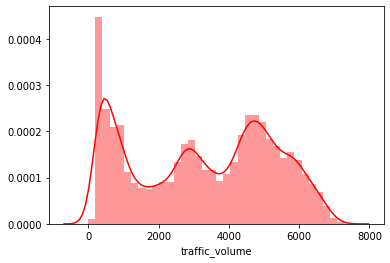

In [29]:
np.mean(df_prep["traffic_volume"])
plot = sns.distplot(df_prep["traffic_volume"], color="red")
name = "traffic"
plt.savefig("out/prep/raw_dist_"+ name +".png")

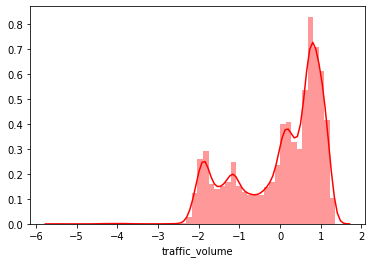

In [30]:
y = df_prep["traffic_volume"]
e = 0.21515151515151515
y_mean = y.apply(lambda x: (x**e)).mean()
transformed = y.apply(lambda x: (x**e)-y_mean)
sns.distplot(transformed,hist=True,color='red')
name = "traffic"
plt.savefig("out/prep/dist_"+ name +".png")
plt.show()

# Train and Test

In [41]:
Y = df_prep['traffic_volume']
print(type(Y))
#Y = df_prep.traffic_volume
print(type(Y))
#Y = transformed
X = df_prep[["temp","rain_1h","snow_1h","clouds_all","hour","day","month","year","weather_main","weather_description"]]

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


## SGD-Regression

In [42]:
MODEL = SGDRegressor
NAME = "SGD"
PATH = "out/"+NAME+"/"
params = {"alpha" : [0.0001]}

modeltrainer = ModelTrainer(MODEL, params, X, Y, f_eval=r2_score)
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.3)
#modeltrainer.CV_fold(k = 6)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = 6)
modeltrainer.train()
res = modeltrainer.result
display(res)

Finished evaluation
R2_score= 0.14412101851084735
Total evaluation time = 0.33s


,alpha,train_time,inference_time,R2_score,RMSE
0,0.0001,0.076138,0.000767,0.144121,3.375390e+06


Finished evaluation
R2_score= 0.1399791914001518
Total evaluation time = 0.43s


,alpha,train_time,inference_time,R2_score,RMSE
0,0.0001,0.150788,0.00081,0.139979,3.333380e+06


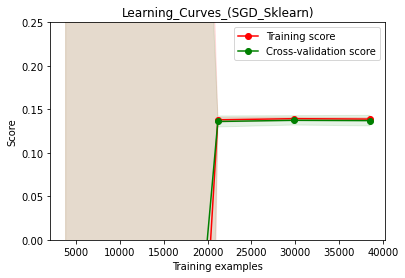

In [43]:
plt.figure()
plt.grid()

title = "Learning_Curves_(SGD_Sklearn)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = SGDRegressor()
plot_learning_curve(estimator, title, X, Y, ylim=(0, 0.25), cv=cv, n_jobs=4)
plt.savefig(PATH+title)
plt.show()

In [44]:
MODEL = LinearRegression
params = {"alpha" : [0.00001], "max_iter": [1000,10000], "weigths": ["residual"]}

modeltrainer = ModelTrainer(MODEL, params, X, Y, f_eval=r2_score)
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.3)
#modeltrainer.CV_fold(k = 6)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = 6)
modeltrainer.train()
res = modeltrainer.result
display(res)

Finished evaluation
R2_score= 0.03221726515616208
Total evaluation time = 2.93s


,alpha,max_iter,weigths,train_time,inference_time,R2_score,RMSE
0,0.00001,1000,residual,1.563033,0.821968,0.032217,3.816712e+06
1,0.00001,10000,residual,2.036397,0.656103,0.032217,3.816712e+06


Finished evaluation
R2_score= 0.03296656409976795
Total evaluation time = 2.44s


,alpha,max_iter,weigths,train_time,inference_time,R2_score,RMSE
0,0.00001,1000,residual,1.173931,0.643505,0.032967,3.748154e+06
1,0.00001,10000,residual,1.844002,0.298321,0.032967,3.748154e+06


## KNN-Regression

In [ ]:
MODEL = KNeighborsRegressor
params = {"weights" : ["uniform"]}
NAME = "KNN"
PATH = "out/"+NAME+"/"

modeltrainer = ModelTrainer(MODEL, params, X, Y, f_eval=r2_score)
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.3)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = 6)
modeltrainer.train()
res = modeltrainer.result
display(res)

In [ ]:
plt.figure()
plt.grid()

title = "Learning_Curves_(KNN_Sklearn)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
#cv = train_test_split(test_size=0.4, random_state=42)

estimator = KNeighborsRegressor()
plot_learning_curve(estimator, title, X, Y, ylim=(0.5, 0.90), cv=cv, n_jobs=4)
plt.savefig(PATH+title)
plt.show()

In [ ]:
MODEL = KNNRegressor
params = {"weights" : ["uniform"]}
#params = {"k" : [3]}

In [ ]:
modeltrainer = ModelTrainer(MODEL, params, X, Y, r2_score)
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.7)
modeltrainer.train()


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = 6)
modeltrainer.train()

## RF-Regression

In [ ]:
MODEL = RandomForestRegressor
params = {"n_estimators" : [100]}
NAME = "RF"
PATH = "out/"+NAME+"/"

modeltrainer = ModelTrainer(MODEL, params, X, Y, f_eval=r2_score)
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.3)
#modeltrainer.CV_fold(k = 6)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = 6)
modeltrainer.train()
res = modeltrainer.result
display(res)

In [ ]:
plt.figure()
plt.grid()

title = "Learning_Curves_(RF_Sklearn)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
#cv = train_test_split(test_size=0.4, random_state=42)

estimator = RandomForestRegressor()
plot_learning_curve(estimator, title, X, Y, ylim=(0.5, 1.01), cv=cv, n_jobs=4)
plt.savefig(PATH+title)
plt.show()

## DT-Regression

In [ ]:
MODEL = DecisionTreeRegressor
params = {"criterion": ["mse"]}
NAME = "DT"
PATH = "out/"+NAME+"/"

modeltrainer = ModelTrainer(MODEL, params, X, Y, f_eval=r2_score)
########### train with TrainTestSplit  ###################
modeltrainer.TTSplit(perc = 0.3)
#modeltrainer.CV_fold(k = 6)
modeltrainer.train()
res = modeltrainer.result
display(res)


########### k-Fold Cross validation  ###################
modeltrainer.CV_fold(k = 6)
modeltrainer.train()
res = modeltrainer.result
display(res)

In [ ]:
plt.figure()
plt.grid()

title = "Learning_Curves_(DT_Sklearn)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
#cv = train_test_split(test_size=0.4, random_state=42)

estimator = DecisionTreeRegressor()
plot_learning_curve(estimator, title, X, Y, ylim=(0.6, 1.01), cv=cv, n_jobs=4)
plt.savefig(PATH+title)
plt.show()